In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# import cv2
# import seaborn as sns
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dropout,BatchNormalization,MaxPooling2D,Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

C:\anacondaML\envs\Deeplearning\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = 'covid vs pneumonia/train'

test_path = 'covid vs pneumonia/test'


In [3]:
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
    
)

training_data = train_datagen.flow_from_directory(
                train_path,
                target_size = (224,224),
                batch_size = 32,
                class_mode = 'categorical'
)

Found 5144 images belonging to 3 classes.


In [4]:
test_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
    
)

testing_data = test_datagen.flow_from_directory(
                test_path,
                target_size = (224,224),
                batch_size = 32,
                class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


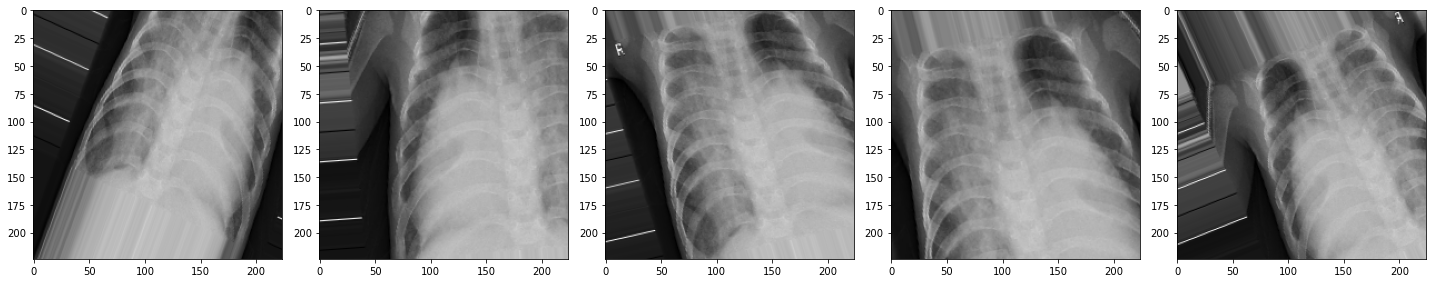

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [6]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='sigmoid')
])

In [7]:
model.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
       metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_data,
    epochs=5,
    validation_data=testing_data)

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()